In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


df = pd.read_csv('WomensClothingE-CommerceReviews.csv')

In [2]:
# Display the first few rows of the DataFrame
print(df.head())



   Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3             

In [3]:
def preprocess_text(text):

    tokens = nltk.word_tokenize(text.lower())

    tokens = [token for token in tokens if token.isalnum()]
    

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [11]:
import pandas as pd

df = pd.read_csv('WomensClothingE-CommerceReviews.csv')

# Extract the first 20 reviews
text1_reviews = df['Review Text'][:20]

# Extract the next 20 reviews
text2_reviews = df['Review Text'][20:40]

# Write the first 20 reviews to Text1.txt
with open('Text1.txt', 'w', encoding='utf-8') as text1_file:
    for review in text1_reviews:
        text1_file.write(review + '\n')

# Write the next 20 reviews to Text2.txt
with open('Text2.txt', 'w', encoding='utf-8') as text2_file:
    for review in text2_reviews:
        text2_file.write(review + '\n')


In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def preprocess_text(text):

    tokens = nltk.word_tokenize(text.lower())
    

    tokens = [token for token in tokens if token.isalnum()]
    

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union


In [13]:

with open('Text1.txt', 'r', encoding='utf-8') as file:

    Text1= file.read()

with open('Text2.txt', 'r', encoding='utf-8') as file:

    Text2= file.read()

tokens1 = set(preprocess_text(Text1))
tokens2 = set(preprocess_text(Text2))

similarity_score = jaccard_similarity(tokens1, tokens2)
print(f"Jaccard Similarity: {similarity_score}")
print(f"Tokens 1: {tokens1}\nTokens 2: {tokens2}")

vectorizer = TfidfVectorizer()
vector1 = vectorizer.fit_transform([' '.join(tokens1)])
vector2 = vectorizer.transform([' '.join(tokens2)])

cos_similarity = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity:\n{cos_similarity}")

Jaccard Similarity: 0.2456813819577735
Tokens 1: {'could', 'front', 'away', 'shimmer', 'dri', 'order', 'open', 'stranger', 'happen', 'estim', 'medium', 'petit', 'ankl', 'everi', 'usual', 'realli', 'crisp', '1', 'hit', 'cozi', 'style', 'still', 'shirt', 'midi', 'beauti', 'review', 'feel', 'pair', 'major', 'typic', '34b', 'rip', 'figur', 'good', 'pale', 'loos', 'someth', 'savvi', 'comfort', 'find', 'net', 'fluffi', 'pant', 'everythi', '125', 'happi', 'tell', 'x', 'busti', 'describ', 'initi', 'imo', 'roomi', '6', 'delic', 'esp', 'lower', 'made', 'regular', 'line', 'shopper', 'go', 'sexi', 'small', 'conserv', 'flatter', 'problem', 'carbon', 'brand', 'though', 'larg', '135', 'flair', 'narrow', 'embellish', 'whit', 'wear', 'pretti', 'smoothli', 'chanc', 'hte', 'baggi', 'ton', 'fun', 'say', 'also', 'flaw', 'parti', 'easili', 'color', 'xx', 'littl', 'love', 'retail', 'absolut', 'perfectli', 'year', 'noth', 'fall', 'larkspur', 'sure', 'alway', 'glad', 'msallet', 'bc', 'sinc', 'silki', 'strap', 

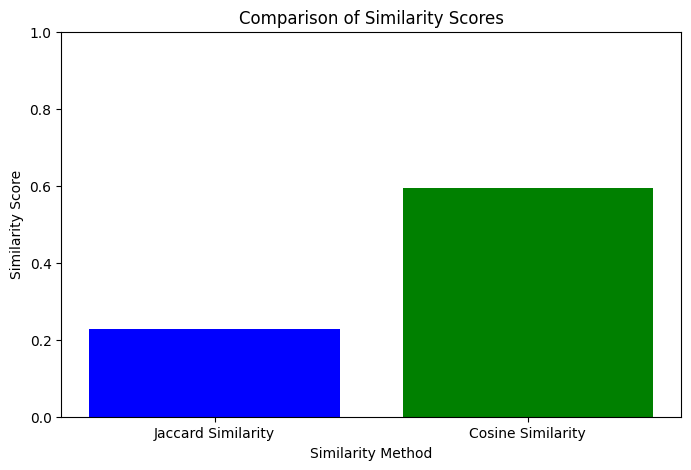

In [14]:

scores = [0.22837370242214533, 0.5935921]
methods = ['Jaccard Similarity', 'Cosine Similarity']


plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['blue', 'green'])
plt.xlabel('Similarity Method')
plt.ylabel('Similarity Score')
plt.title('Comparison of Similarity Scores')
plt.ylim(0, 1) 
plt.show()

